## K-nearest neighbor (KNN)

- 비모수적 방법으로서 데이터 개수가 많아야 분산이 작아지기 때문에, 데이터를 대량 확보해야 함.

- 데이터의 양이 무한대로 증가할수록 오차율이 베이즈 오차율의 두 배보다 너 나쁘지 않음이 보장된다.

- 고차원 데이터는 차원의 저주를 피하기 위해 차원 축소가 선행되는 경우가 많음.

In [1]:
! pip install finance-datareader


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

import FinanceDataReader as fdr

In [3]:
df = fdr.DataReader('SPY','2012-01-01','2017-01-01') #S&P 추종 ETF 외에도 GLD나 TLT 등도 테스트해보기
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,102.458961,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,102.619713,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,102.892899,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,102.627731,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,102.876846,99530200
...,...,...,...,...,...,...
2016-12-23,225.429993,225.720001,225.210007,225.710007,201.048309,36697800
2016-12-27,226.020004,226.729996,226.000000,226.270004,201.547150,42672500
2016-12-28,226.570007,226.589996,224.270004,224.399994,199.881470,64095000


In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,102.458961,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,102.619713,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,102.892899,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,102.627731,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,102.876846,99530200


In [5]:
tmp_df = df[['Open','High','Low','Close']].copy()
tmp_df.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000
2012-01-04,127.199997,127.809998,126.709999,127.699997
2012-01-05,127.010002,128.229996,126.430000,128.039993
2012-01-06,128.199997,128.220001,127.290001,127.709999
2012-01-09,128.000000,128.179993,127.410004,128.020004


In [22]:
tmp_df['Open-Close'] = tmp_df['Open'] - tmp_df['Close']
tmp_df['High-Low'] = tmp_df['High'] - tmp_df['Low']
tmp_df = tmp_df.dropna()
X = tmp_df[['Open-Close','High-Low']]
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Open'].shift(-1), 1, -1)

In [23]:
X.head()

,Open-Close,High-Low
Date,,
2012-01-03,0.260002,0.950005
2012-01-04,-0.500000,1.099999
2012-01-05,-1.029991,1.799996
2012-01-06,0.489998,0.930000
2012-01-09,-0.020004,0.769989


오늘의 종가 대비 내일의 종가가 높다면 가격이 오른다고 가정. 하지만 오늘의 종가가 나온 시점에서 매수 전략을 시행하기 어렵다.
따라서 다음날 시가에 살 수 있도록 (이 또한 슬리피지 존재하지만) 다음날의 종가가 다음날의 시가보다 높다면 가격이 오른다고 정의함.

In [24]:
# 시각화
# 그래프 범위 나타내기 위한 변수 설정
x_min, x_max = X['Open-Close'].min() - .5, X['Open-Close'].max() + .5
y_min, y_max = X['High-Low'].min() - .5, X['High-Low'].max() + .5

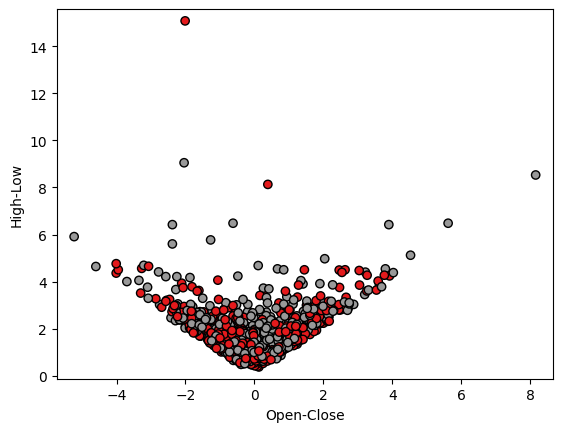

In [25]:
plt.scatter(X['Open-Close'], X['High-Low'], c=Y, cmap=plt.cm.Set1, edgecolor='k')
# c는 데이터포인트 색상, camp은 사전에 정의된 Set1색상 맵, edgecolor 데이터포인트 테두리는 k(검정)색

plt.xlabel('Open-Close')
plt.ylabel('High-Low')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [26]:
# 학습 데이터 테스트 데이터 분리
split_ratio = 0.7
split = int(split_ratio* len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [27]:
# KNN 모델 학습
# for 반복문을 통해 1~15까지의 k값을 가진 모델을 만들어 봄
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append((prediction==Y_test).mean())

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

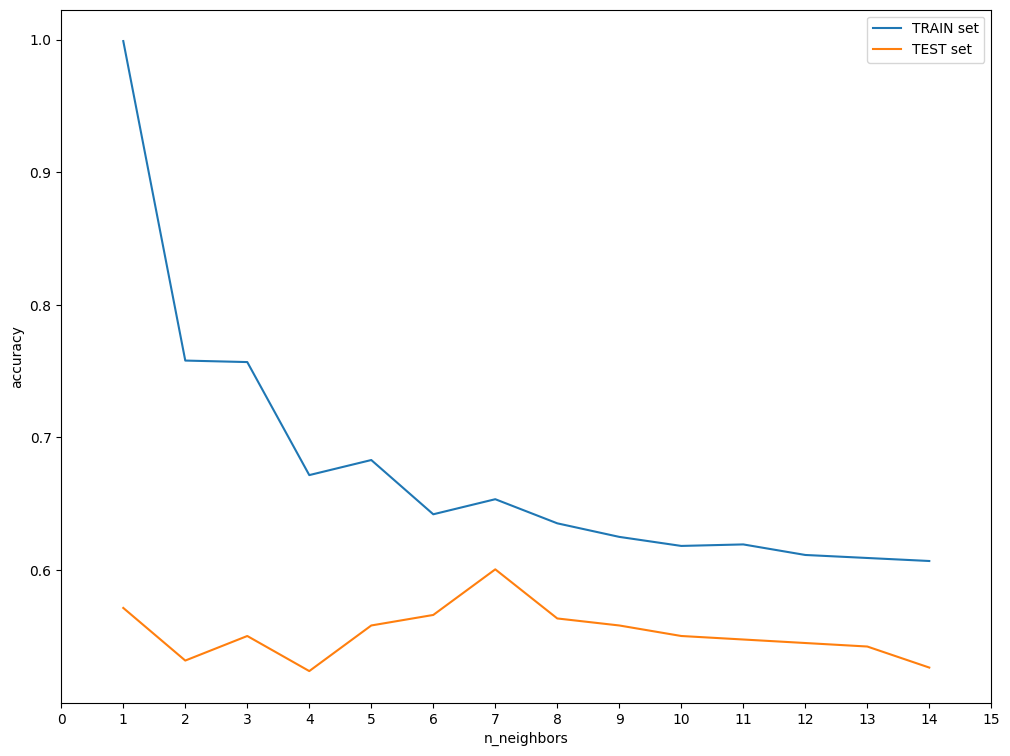

In [28]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

- K가 1일때는 훈련 데이터가 모든 패턴을 외워서 100%의 정확도가 나온다. 반면 테스트 데이터에서의 성능은 저조하다. --> 과적합
- 테스트 셋을 보면 k=7 일때 성능이 가장 좋다. 

In [29]:
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('훈련 정확도 : %.2f' % accuracy_train)
print('테스트 정확도 : %.2f' % accuracy_test)

훈련 정확도 : 0.65
테스트 정확도 : 0.60


C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

## KNN을 활용한 투자전략

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

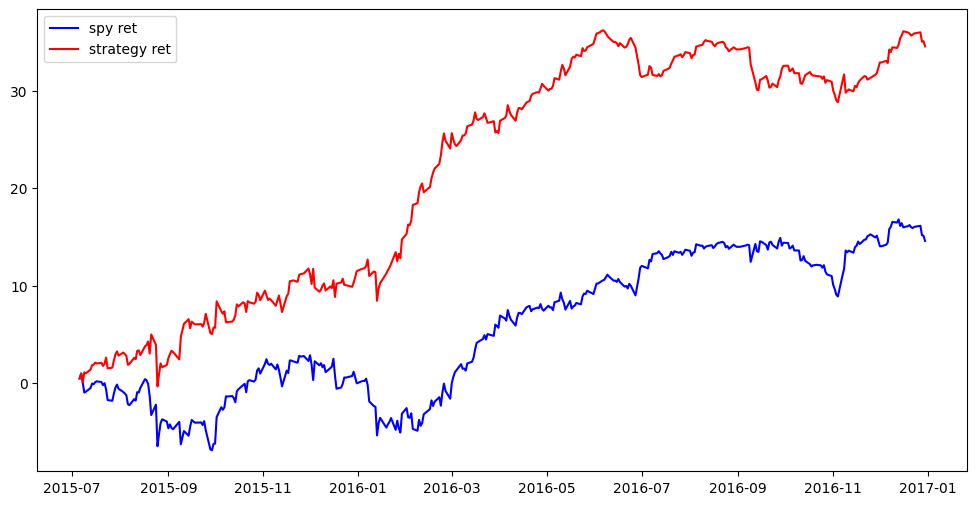

In [30]:
tmp_df['Predicted_Signal'] = knn.predict(X)

tmp_df['SPY_ret'] = np.log(tmp_df['Close'] / tmp_df['Open'])
cum_spy_ret = tmp_df[split:]['SPY_ret'].cumsum() * 100

tmp_df['strategy_ret'] = tmp_df['SPY_ret'] * tmp_df['Predicted_Signal'].shift(1)
cum_st_ret = tmp_df[split:]['strategy_ret'].cumsum() * 100

plt.figure(figsize=(12,6))
plt.plot(cum_spy_ret, color='b',label='spy ret')
plt.plot(cum_st_ret , color='r', label='strategy ret')
plt.legend()
plt.show()

In [32]:
tmp_df

,Open,High,Low,Close,Open-Close,High-Low,Predicted_Signal,SPY_ret,strategy_ret
Date,,,,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,0.260002,0.950005,1,-0.002037,NaN
2012-01-04,127.199997,127.809998,126.709999,127.699997,-0.500000,1.099999,1,0.003923,0.003923
2012-01-05,127.010002,128.229996,126.430000,128.039993,-1.029991,1.799996,-1,0.008077,0.008077
2012-01-06,128.199997,128.220001,127.290001,127.709999,0.489998,0.930000,1,-0.003829,0.003829
2012-01-09,128.000000,128.179993,127.410004,128.020004,-0.020004,0.769989,1,0.000156,0.000156
...,...,...,...,...,...,...,...,...,...
2016-12-23,225.429993,225.720001,225.210007,225.710007,-0.280014,0.509994,1,0.001241,0.001241
2016-12-27,226.020004,226.729996,226.000000,226.270004,-0.250000,0.729996,1,0.001105,0.001105
2016-12-28,226.570007,226.589996,224.270004,224.399994,2.170013,2.319992,-1,-0.009624,-0.009624


In [33]:
print('TOTAL : ',tmp_df['Predicted_Signal'].count())
print('UP predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == 1,['Predicted_Signal']].count()[0])
print('DOWN predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == -1,['Predicted_Signal']].count()[0])

TOTAL :  1258
UP predict :  780
DOWN predict :  478


C:\Users\jh102\AppData\Local\Temp\ipykernel_28420\729923303.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('UP predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == 1,['Predicted_Signal']].count()[0])
C:\Users\jh102\AppData\Local\Temp\ipykernel_28420\729923303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('DOWN predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == -1,['Predicted_Signal']].count()[0])


In [34]:
test = tmp_df[split:]['SPY_ret']

In [35]:
test.cumsum()

Date
2015-07-06    0.004606
2015-07-07    0.009715
2015-07-08    0.000517
2015-07-09   -0.009873
2015-07-10   -0.008957
                ...   
2016-12-23    0.160291
2016-12-27    0.161396
2016-12-28    0.151772
2016-12-29    0.151193
2016-12-30    0.145839
Name: SPY_ret, Length: 378, dtype: float64

In [36]:
# 샤프지수
std = cum_st_ret.std()
sharpe = (cum_st_ret - cum_spy_ret) / std
sharpe = sharpe.mean()
print('Sharpe ratio : %.2f' % sharpe)

Sharpe ratio : 1.30


In [37]:
# 샤프지수도 1.3으로 높은 편. 하지만 단일 전략으로는 위험하다.
# 훈련기간과 테스트기간이 짧다.
# 만약 데이터에 추세나 계절성이 있다면 KNN은 제대로 포착하지 못함.

cum_spy_ret

Date
2015-07-06     0.460617
2015-07-07     0.971484
2015-07-08     0.051658
2015-07-09    -0.987337
2015-07-10    -0.895718
                ...    
2016-12-23    16.029078
2016-12-27    16.139626
2016-12-28    15.177243
2016-12-29    15.119319
2016-12-30    14.583916
Name: SPY_ret, Length: 378, dtype: float64

## KNN을 활용한 종목 분류

In [1]:
# https://github.com/quant4junior/algoTrade
# 저자의 깃허브 링크에서 결측치가 나오는 기업의 처리를 위해
# tickers를 기준으로 merge가 가능하게 코드 수정을 함.

In [2]:
!pip install finance-datareader


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import FinanceDataReader as fdr

# 사이킷런의 전처리 모듈
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

데이터 전처리   

In [4]:
# S&P 500 종목 리스트 가져오기
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].tolist()[:60]  # TICKER명만 리스트로 만든다.
security = data_table[0]['Security'].tolist()[:60] # TICKER의 full name
sector = data_table[0]['GICS Sector'].tolist()[:60]

# FinanceDataReader를 사용하여 주가 데이터 가져오기
prices_list = []

for ticker in tickers:
    df = fdr.DataReader(ticker,'01/01/2017')['Adj Close']
    prices_list.append(df)

# 데이터 합치기
prices_df = pd.concat(prices_list, axis=1)
prices_df.columns = tickers

# 결과 확인
prices_df

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,138.587067,42.250427,34.462345,45.883419,104.547783,38.066936,103.480003,89.861221,9.227077,29.518644,...,63.662746,76.180000,791.460022,140.666245,62.227989,24.580000,37.292255,35.459080,19.437311,42.422543
2017-01-04,138.797226,42.624008,34.735924,46.530380,104.799171,38.001019,104.139999,90.000153,9.147941,29.789417,...,64.021408,77.519997,793.039978,141.247604,64.002380,24.850000,37.131683,35.997402,19.799665,42.906780
2017-01-05,138.322433,42.428322,35.035984,46.883282,103.228165,37.720802,105.910004,89.461823,9.029243,29.594805,...,63.705418,76.930000,792.000000,142.107803,63.372482,24.680000,36.902294,35.978683,19.566721,39.529797
2017-01-06,138.727188,42.446106,35.989101,46.897968,104.404182,36.855457,108.300003,89.522606,9.353692,29.696341,...,63.338234,79.300003,792.909973,143.358200,64.233063,24.549999,36.678650,36.137836,19.566721,39.013695
2017-01-09,137.979935,42.161484,35.953804,47.206760,103.237152,36.880180,108.570000,88.966949,9.124199,29.412874,...,62.518440,79.589996,790.340027,141.144089,64.375023,24.270000,36.265759,35.566750,19.454567,39.058304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,91.253983,73.379997,95.790001,138.639999,315.630005,72.589996,590.340027,226.350006,15.540000,81.010002,...,111.120003,210.100006,2707.120117,165.289993,179.669998,218.660004,34.470001,48.599998,27.700001,29.547047
2023-11-14,93.498665,76.019997,97.080002,138.059998,320.489990,73.860001,604.330017,230.419998,16.940001,81.820000,...,114.139999,217.360001,2684.530029,171.869995,187.949997,221.580002,34.700001,50.939999,29.219999,31.316093
2023-11-15,95.320000,75.000000,98.000000,137.600006,325.500000,74.239998,595.309998,230.460007,17.010000,80.419998,...,113.529999,216.110001,2686.419922,170.960007,188.970001,221.080002,34.660000,51.970001,29.620001,32.299999


In [5]:
df = prices_df.pct_change().iloc[1:].T
df.head()

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,2023-11-15,2023-11-16,2023-11-17
MMM,0.001516,-0.003421,0.002926,-0.005386,-0.003892,0.007419,-0.002529,-0.000282,-0.000733,0.006939,...,-0.003622,-0.003956,-0.008910,-0.006716,0.012105,-0.001293,0.024598,0.019480,0.004091,-0.003866
AOS,0.008842,-0.004591,0.000419,-0.006705,0.007595,0.011516,-0.009936,0.013171,-0.012175,0.000627,...,-0.006568,-0.006189,0.006936,0.003233,0.020317,0.007690,0.035977,-0.013417,0.008533,0.009783
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001341,-0.008763,0.005157,-0.000733,-0.003423,...,-0.008765,-0.002105,-0.000633,-0.012561,0.004490,0.019368,0.013467,0.009477,0.023061,-0.007082
ABBV,0.014100,0.007584,0.000313,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,-0.001556,0.006799,-0.000914,-0.028093,0.003984,0.000361,-0.004184,-0.003332,0.004942,0.000145
ACN,0.002405,-0.014991,0.011392,-0.011178,0.000522,0.009212,-0.002928,0.010106,-0.007867,-0.000689,...,-0.001276,0.006707,0.008344,-0.011327,0.017408,-0.012700,0.015398,0.015632,0.005591,0.001558


In [6]:
len(df)

60

In [7]:
#누락된 데이터가 없는지 확인한다.
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)
df.loc[row_mask, col_mask]

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-11-27,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-07,2020-12-08,2020-12-09,2020-12-10
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)
len(df)

59

In [9]:
# 데이터프레임 생성
sp500_df = pd.DataFrame({'tickers': tickers, 'security': security, 'sector': sector})

# 결과 확인
sp500_df.head(n=10)

,tickers,security,sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology
5,ADM,ADM,Consumer Staples
6,ADBE,Adobe Inc.,Information Technology
7,ADP,ADP,Industrials
8,AES,AES Corporation,Utilities
9,AFL,Aflac,Financials


클러스터링 시작

In [10]:
# 데이터 정규화
normalize = Normalizer()
array_norm = normalize.fit_transform(df) #fit_transform()함수
df_norm = pd.DataFrame(array_norm, columns = df.columns)
final_df = df_norm.set_index(df.index)
final_df.head(10)

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,2023-11-15,2023-11-16,2023-11-17
MMM,0.002256,-0.005088,0.004352,-0.008012,-0.005789,0.011034,-0.003762,-0.000420,-0.001090,0.010321,...,-0.005388,-0.005885,-0.013253,-0.009989,0.018004,-0.001923,0.036587,0.028974,0.006086,-0.005750
AOS,0.011897,-0.006177,0.000564,-0.009022,0.010218,0.015494,-0.013368,0.017722,-0.016381,0.000843,...,-0.008837,-0.008327,0.009332,0.004350,0.027335,0.010347,0.048406,-0.018053,0.011481,0.013163
ABT,0.012296,0.013379,0.042135,-0.001519,0.020910,0.002076,-0.013573,0.007987,-0.001135,-0.005302,...,-0.013575,-0.003261,-0.000980,-0.019455,0.006954,0.029998,0.020858,0.014678,0.035718,-0.010968
ABBV,0.020427,0.010988,0.000454,0.009539,-0.003159,-0.052304,0.003318,0.016785,-0.003038,-0.004684,...,-0.002254,0.009850,-0.001325,-0.040699,0.005772,0.000523,-0.006061,-0.004827,0.007159,0.000210
ACN,0.003511,-0.021889,0.016635,-0.016322,0.000762,0.013452,-0.004276,0.014756,-0.011487,-0.001007,...,-0.001863,0.009794,0.012184,-0.016540,0.025419,-0.018544,0.022484,0.022826,0.008165,0.002275
ADM,-0.002572,-0.010953,-0.034075,0.000996,-0.009626,-0.015034,-0.019238,0.004104,0.038531,0.008642,...,-0.007130,-0.009212,-0.001648,0.002681,0.006998,0.011063,0.025987,0.007642,-0.006402,0.000804
ADBE,0.006946,0.018511,0.024577,0.002715,-0.003110,0.007344,-0.003997,-0.000602,-0.005319,0.007967,...,0.003459,0.038040,0.000205,-0.014086,0.036722,-0.012547,0.025810,-0.016256,0.012349,0.001085
ADP,0.002234,-0.008643,0.000982,-0.008969,-0.003807,0.014139,0.008401,-0.000418,-0.009747,-0.002242,...,0.008104,0.011204,0.021000,0.006665,0.012566,-0.013533,0.025982,0.000251,-0.003448,-0.003268
AES,-0.009565,-0.014471,0.040075,-0.027363,-0.019345,0.043311,-0.018004,0.013483,0.018080,0.001873,...,-0.029891,-0.013651,0.005528,-0.040567,0.004995,-0.011366,0.100474,0.004608,-0.006557,0.006595
AFL,0.012406,-0.008835,0.004640,-0.012910,-0.001751,0.008376,-0.005614,0.001361,0.004661,0.001742,...,-0.013651,-0.006978,-0.011023,0.009766,0.009696,-0.000830,0.013523,-0.023141,0.011604,0.011005


In [11]:
num_of_clusters = range(2,12) # 2부터 12까지 차례로 클러스터 수를 지정
error = []
for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)    
table=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})

table

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

,Cluster_Numbers,Error_Term
0,2,0.313422
1,3,0.285642
2,4,0.273291
3,5,0.263060
4,6,0.252995
5,7,0.245776
6,8,0.238928
7,9,0.229566
8,10,0.219551
9,11,0.214751


Elbow method

K-mean clustering에서는 elbow 방법과 silhouette 방법을 사용하는데, 최적의 k 값을 찾을 때에는 elbow 방법을 사용한다.

SSE 감소 비율이 급격하게 작아지는 부분을 찾는다. 아래 결과물에서는 이러한 부분이 관측되지 않는다.

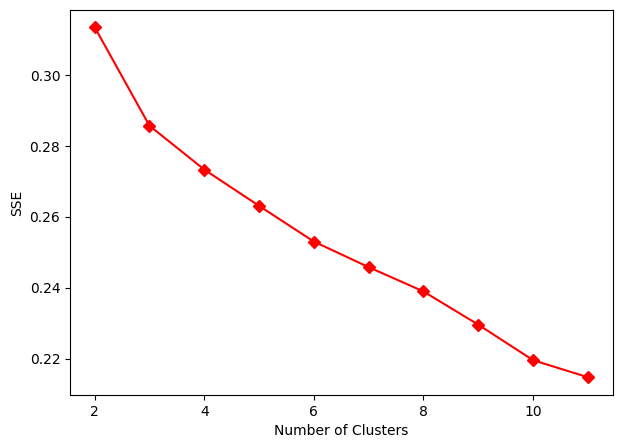

In [12]:
from sklearn import metrics
plt.figure(figsize=(7,5))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [13]:
# 종목 수를 고려해 임의로 7개의 클러스터로 나눔
clusters = KMeans(7)
clusters.fit(final_df)
clusters.labels_

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

array([0, 2, 2, 3, 2, 2, 1, 2, 6, 6, 2, 2, 1, 4, 2, 5, 1, 2, 5, 6, 1, 1,
       0, 1, 2, 1, 5, 4, 5, 6, 6, 5, 5, 6, 2, 3, 2, 1, 1, 2, 6, 1, 1, 6,
       6, 1, 2, 6, 6, 5, 1, 2, 5, 2, 1, 6, 2, 6, 2])

In [14]:
companies = list(df.index)
movements = df.values
labels = clusters.predict(movements)
labels

array([0, 2, 2, 3, 2, 2, 1, 2, 6, 6, 2, 2, 1, 4, 2, 5, 1, 2, 5, 6, 1, 1,
       0, 1, 2, 1, 5, 4, 5, 6, 6, 5, 5, 6, 2, 3, 2, 1, 1, 2, 6, 1, 1, 6,
       6, 1, 2, 6, 6, 5, 1, 2, 5, 2, 1, 6, 2, 6, 2])

In [ ]:
# df

In [15]:
print('labels : ',len(labels))
print('companies : ',len(companies))
print('security : ',len(security))
print('sector : ',len(sector))

labels :  59
companies :  59
security :  60
sector :  60


In [16]:
SnP500_Data = pd.DataFrame({'labels': labels, 'tickers': companies})
SnP500_Data.head()   

,labels,tickers
0,0,MMM
1,2,AOS
2,2,ABT
3,3,ABBV
4,2,ACN


In [17]:
# 클러스터링 결과물 확인
merged_df = pd.merge(SnP500_Data, sp500_df, on='tickers', how='left')
merged_df.sort_values('labels')

,labels,tickers,security,sector
0,0,MMM,3M,Industrials
22,0,MO,Altria,Consumer Staples
21,1,GOOG,Alphabet Inc. (Class C),Communication Services
20,1,GOOGL,Alphabet Inc. (Class A),Communication Services
25,1,AMD,AMD,Information Technology
16,1,ALGN,Align Technology,Health Care
37,1,ADI,Analog Devices,Information Technology
38,1,ANSS,Ansys,Information Technology
12,1,AKAM,Akamai,Information Technology
41,1,AAPL,Apple Inc.,Information Technology


시각화

In [18]:
final_df['Cluster'] = clusters.labels_
final_df.head()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,...,2023-11-07 00:00:00,2023-11-08 00:00:00,2023-11-09 00:00:00,2023-11-10 00:00:00,2023-11-13 00:00:00,2023-11-14 00:00:00,2023-11-15 00:00:00,2023-11-16 00:00:00,2023-11-17 00:00:00,Cluster
MMM,0.002256,-0.005088,0.004352,-0.008012,-0.005789,0.011034,-0.003762,-0.000420,-0.001090,0.010321,...,-0.005885,-0.013253,-0.009989,0.018004,-0.001923,0.036587,0.028974,0.006086,-0.005750,0
AOS,0.011897,-0.006177,0.000564,-0.009022,0.010218,0.015494,-0.013368,0.017722,-0.016381,0.000843,...,-0.008327,0.009332,0.004350,0.027335,0.010347,0.048406,-0.018053,0.011481,0.013163,2
ABT,0.012296,0.013379,0.042135,-0.001519,0.020910,0.002076,-0.013573,0.007987,-0.001135,-0.005302,...,-0.003261,-0.000980,-0.019455,0.006954,0.029998,0.020858,0.014678,0.035718,-0.010968,2
ABBV,0.020427,0.010988,0.000454,0.009539,-0.003159,-0.052304,0.003318,0.016785,-0.003038,-0.004684,...,0.009850,-0.001325,-0.040699,0.005772,0.000523,-0.006061,-0.004827,0.007159,0.000210,3
ACN,0.003511,-0.021889,0.016635,-0.016322,0.000762,0.013452,-0.004276,0.014756,-0.011487,-0.001007,...,0.009794,0.012184,-0.016540,0.025419,-0.018544,0.022484,0.022826,0.008165,0.002275,2


In [19]:
final_df.tail()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,...,2023-11-07 00:00:00,2023-11-08 00:00:00,2023-11-09 00:00:00,2023-11-10 00:00:00,2023-11-13 00:00:00,2023-11-14 00:00:00,2023-11-15 00:00:00,2023-11-16 00:00:00,2023-11-17 00:00:00,Cluster
AXON,0.008551,-0.005326,-0.004101,-0.008879,0.011547,0.000000,-0.011062,0.030459,-0.012650,0.008782,...,-0.001759,0.047527,-0.047065,0.008084,0.002572,0.010396,-0.001757,0.005916,0.002516,1
BKR,-0.003934,-0.005644,-0.005536,-0.010284,-0.012423,0.014645,-0.013838,-0.021953,0.014696,-0.002361,...,-0.028238,-0.003238,0.004874,0.011312,0.003458,0.006096,-0.001053,-0.037427,0.012917,6
BALL,0.019567,-0.000670,0.005702,-0.020369,-0.006107,0.018579,0.005713,-0.014721,0.005414,0.008257,...,-0.009956,-0.002830,-0.034807,0.004505,-0.005545,0.062058,0.026061,-0.002480,0.012176,2
BAC,0.021697,-0.013693,0.000000,-0.006671,0.020129,0.006595,-0.007567,0.004570,-0.048557,0.030614,...,-0.006984,-0.011159,-0.015023,0.006341,0.000841,0.063865,0.015932,-0.003143,0.017336,6
BBWI,0.007601,-0.052408,-0.008694,0.000761,0.000543,-0.000869,-0.006086,-0.000219,0.004937,0.007950,...,0.000846,0.001267,-0.017490,0.005843,-0.028103,0.039868,0.020921,-0.045354,-0.016370,2


C:\Users\jh102\AppData\Local\Temp\ipykernel_25624\679818490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Cluster', data = final_df, palette = 'magma')


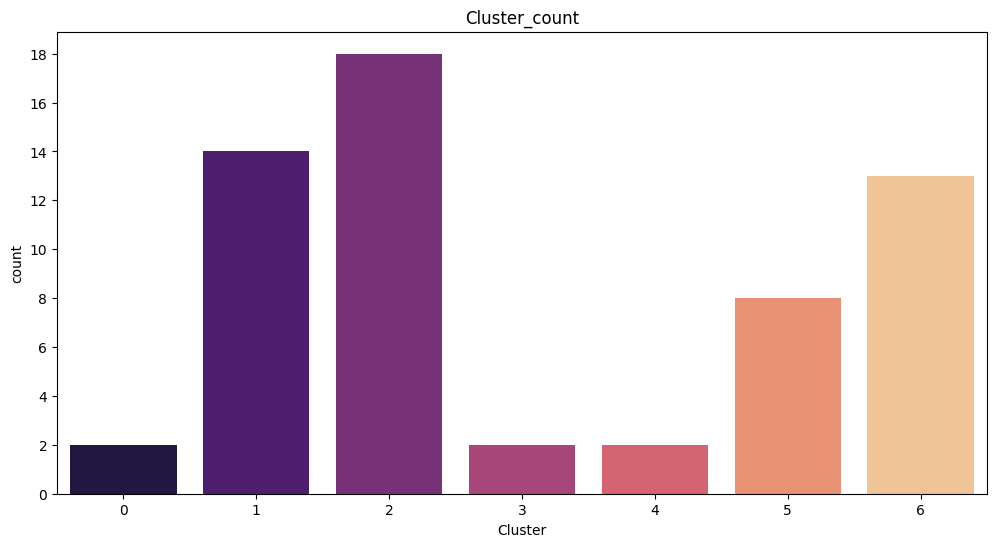

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Cluster', data = final_df, palette = 'magma')
plt.title('Cluster_count')
# Y축 눈금 설정
plt.yticks(range(0, final_df['Cluster'].value_counts().max() + 1, 2))

#plt.savefig('cluster_count.png', dpi=300)
plt.show()